# Sanity Check -- Post Processing
Version: 1 <br>
Creator: Elyès Tabbane <br>
Acquisition Date: 10.10.2024 <br>
Participant: 11 <br>
Center: Neurospin <br>
Description: Data post MNE BIDS pipeline
<br><br>

In [1]:
# Imports
from modules import *

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', 150)      # Display up to 150 rows

Using matplotlib as 2D backend.


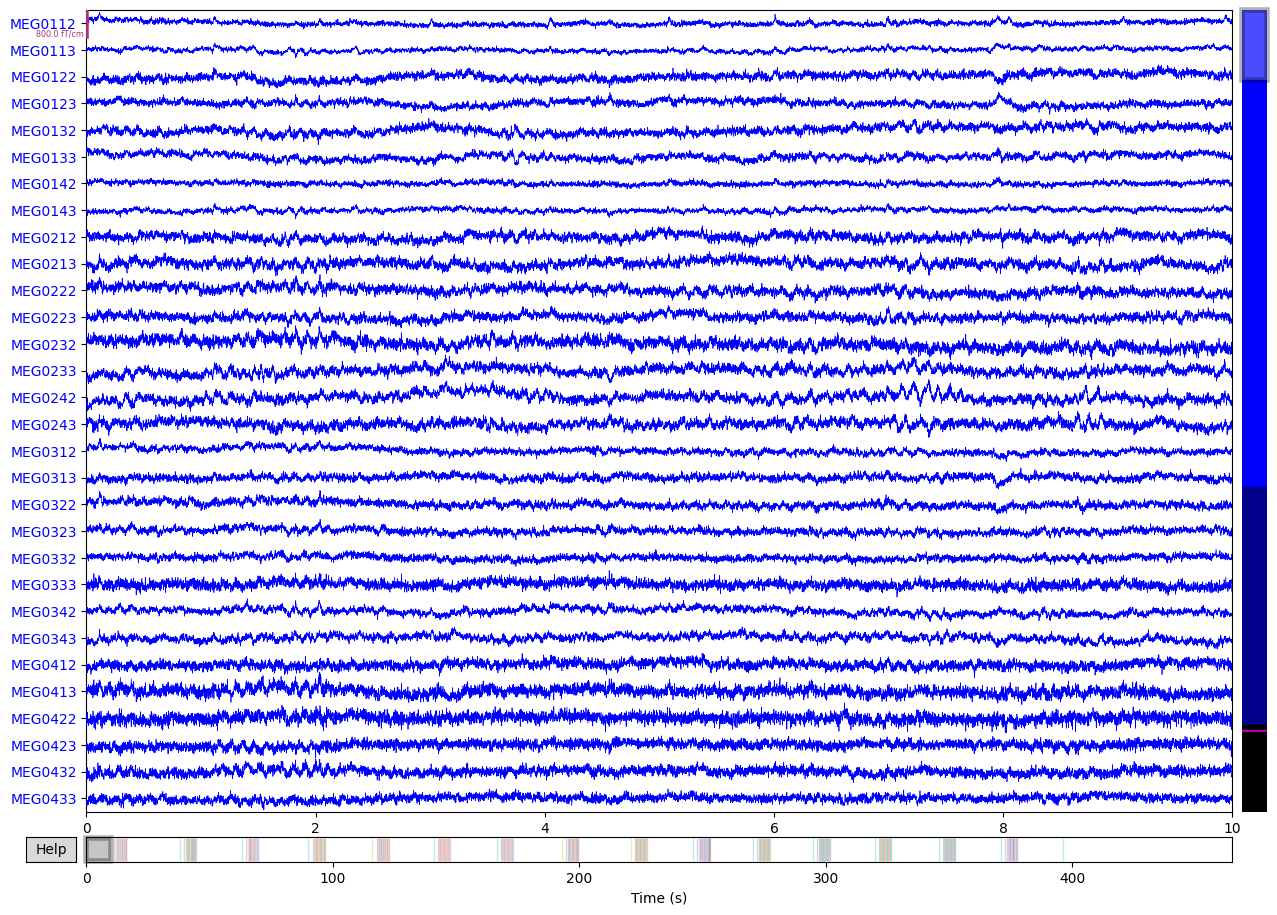

Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/Users/et/Documents/UNICOG/8-MEG/sanity_checkMEG/scripts/modules/functions_sanity_check.py:459: RuntimeWarning: (X, Y) fit (-19.8, 4.2) more than 20 mm from head frame origin
  raw.compute_psd().plot()
/Users/et/Documents/UNICOG/8-MEG/sanity_checkMEG/scripts/modules/functions_sanity_check.py:459: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.compute_psd().plot()
/opt/anaconda3/envs/mne_python/lib/python3.9/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


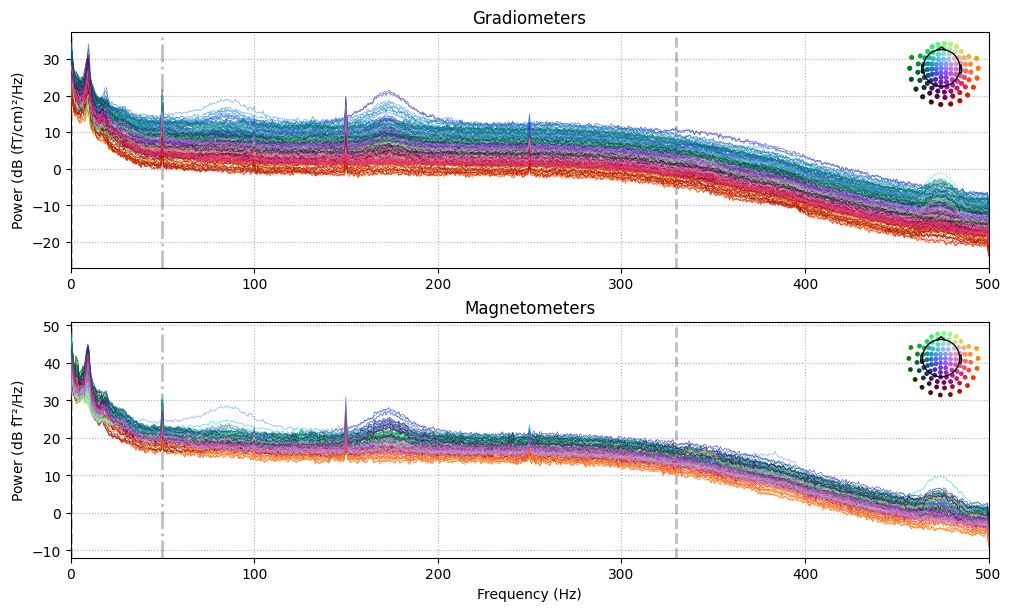

In [5]:
for i in range(1,19):
    run=i
    inspect_raw(run,post_processing=True)

---
<h1 style="color:'blue'"> Plot Evoked response for [ITEMS]</h1>

Reading /Volumes/T5_EVO/1-experiments/REPLAYSEQ/2-Data/derivatives/items/sub-03/meg/sub-03_task-reproduction_epo.fif ...
    Found the data of interest:
        t =    -192.00 ...     592.00 ms
        0 CTF compensation matrices available
Adding metadata with 46 columns
2520 matching events found
No baseline correction applied
0 projection items activated
Applying baseline correction (mode: mean)


/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_4503/408349514.py:3: RuntimeWarning: (X, Y) fit (-19.8, 4.2) more than 20 mm from head frame origin
  evoked.plot(gfp=True)


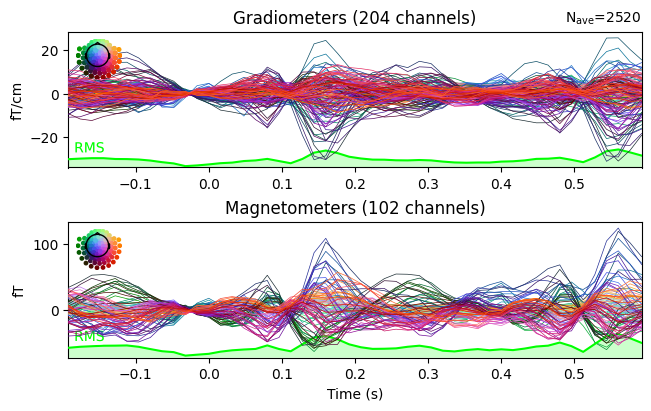

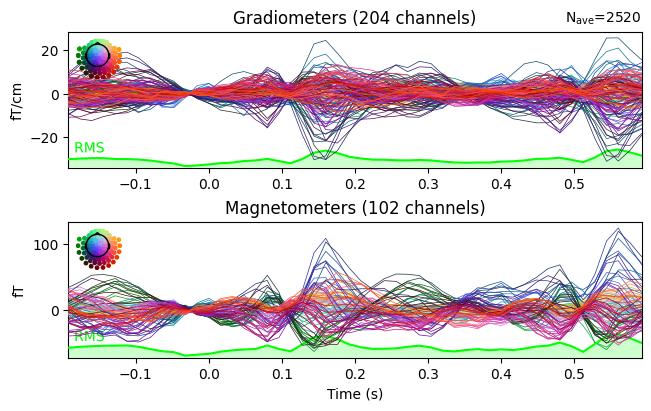

In [6]:
epoch_items=mne.read_epochs(epo_item_path)
evoked=epoch_items.apply_baseline([-0.05,0]).average()
evoked.plot(gfp=True)

/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_4503/3449960197.py:2: RuntimeWarning: (X, Y) fit (-19.8, 4.2) more than 20 mm from head frame origin
  evoked.plot_topomap(times, ch_type="mag")


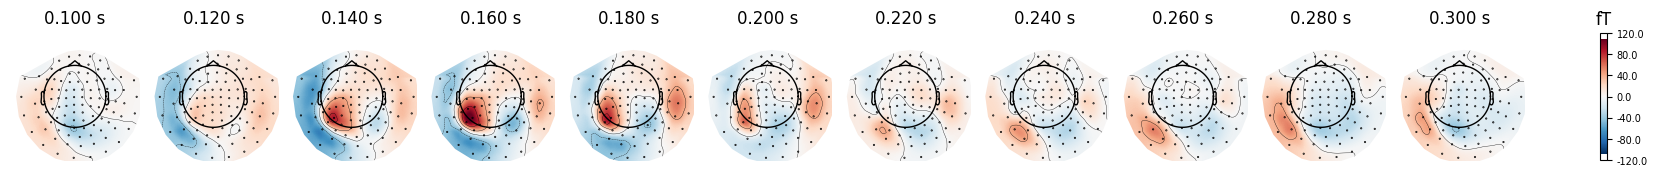

/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_4503/3449960197.py:3: RuntimeWarning: (X, Y) fit (-19.8, 4.2) more than 20 mm from head frame origin
  evoked.plot_topomap(times, ch_type="grad")


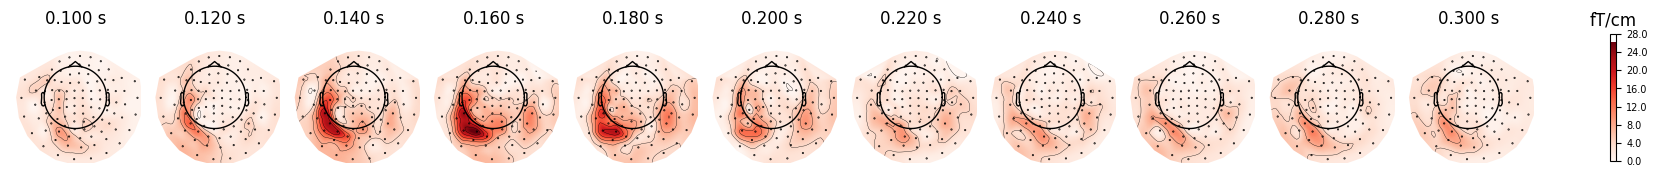

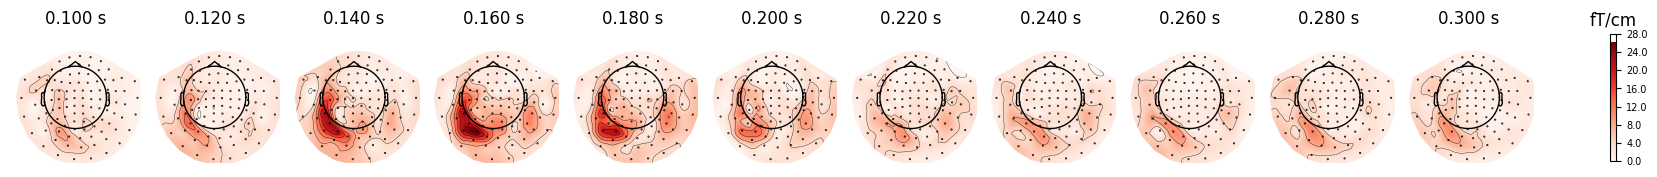

In [7]:
times = np.arange(0.1, 0.301, 0.02)
evoked.plot_topomap(times, ch_type="mag")
evoked.plot_topomap(times, ch_type="grad")

Applying baseline correction (mode: mean)


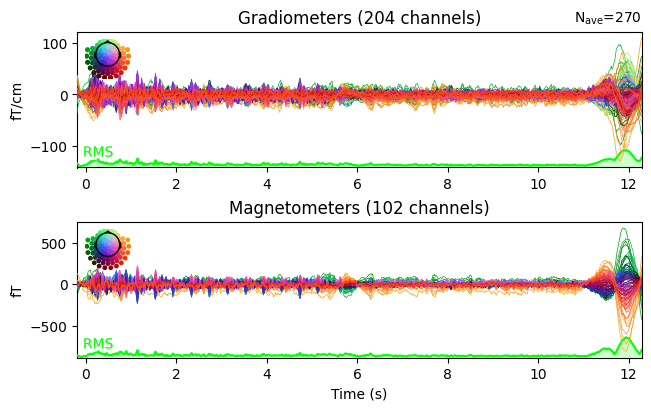

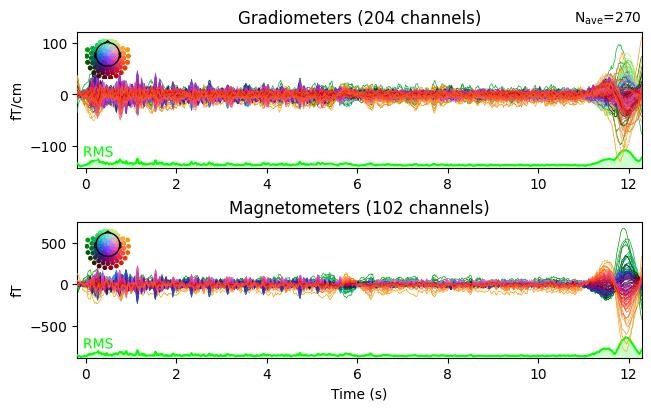

In [27]:
epoch_sequence=mne.read_epochs(epo_sequence_path)
evoked=epoch_sequence.apply_baseline([None,0]).average()
evoked.plot(gfp=True)

In [ ]:

# 1. ajouter les métadonnées aux epochs. (Fonctionne différemment pour item et séquences)
epoch_sequence.metadata=pd.read_csv(path_processed_behavioral_file)

# 2. Créer le dictionnaire avec les epochs correspondantes
evoked_dict = {name: epoch_sequence[f"sequenceName == '{name}'"].average() for name in ordered_seq_name_list}

# 3. plot evokeds with the dictionary

mne.viz.plot_compare_evokeds(
    evoked_dict,
    legend="upper left",
    show_sensors="upper right",
    cmap="viridis"
)

Replacing existing metadata with 14 columns
